# PHAS0029 Session 6 Task:
# Normal modes of beads connected by springs

You are going to calculate the normal modes of vibration of a system of $N$ beads connected by $N+1$ Hookean springs to fixed end points. The beads are able to move horizontally but not vertically. This provides us with a basic but useful model of vibrations in a solid, where the beads represent atoms and the springs the interatomic bonds.

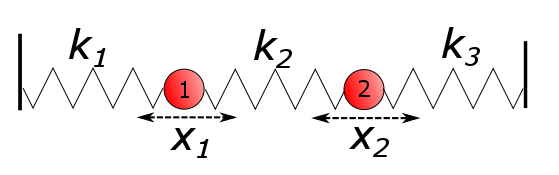

In [1]:
from IPython.display import Image # needed to embed an image
Image(filename='3springs2beads.png', embed=True)
# This image file is on Moodle. 
# It will appear here if you downloaded the image and it's in the same folder as this notebook!

First consider a system of just two beads, labelled 1 and 2, connected by three springs with spring constants $k_1$, $k_2$, $k_3$ to two fixed end points, as in the figure above. The displacement of each bead from its equilibrium position is given by $x_1$ and $x_2$, as shown. By considering each spring individually, we can see that the forces exerted by the springs are:

**Spring 1** exerts a force $-k_1 x_1$ on bead 1.

**Spring 2** exerts a force $-k_2(x_1 - x_2)$ on bead 1 and a force $-k_2(x_2 - x_1)$ on bead 2.

**Spring 3** exerts a force $-k_3 x_2$ on bead 2.

We can then write the total forces on the beads in the form of a matrix equation:

$$
\mathbf{F} =-\mathbf{K}\cdot \mathbf{x} = -\begin{pmatrix}
    k_1 + k_2 & -k_2 \\
    -k_2 & k_2 + k_3 
  \end{pmatrix}
  \begin{pmatrix}
   x_1 \\ x_2 \end{pmatrix}
$$

This can easily be extended to a system of $N$ beads with $N+1$ springs, which gives us a [tridiagonal](http://en.wikipedia.org/wiki/Tridiagonal_matrix) matrix for the spring constants $k_i$:

$$ \mathbf{K} = 
\begin{pmatrix}
k_1 + k_2 & -k_2 & 0 &  & \ldots &  0  \\
-k_2 & k_2 + k_3 & -k_3 & & \ldots &0 \\
 0 & -k_3 & k_3 + k_4 & -k_4 & \ldots & 0 \\
\vdots &  & \ddots & & & \vdots \\
0 & 0 & \ldots &  & -k_N & k_N + k_{N+1} \\
\end{pmatrix}
$$

We also know that for a harmonic oscillator, the spring constants are related to the angular frequency by

$$ k = m \omega^2 $$

and hence when we represent this in matrix form, we have

$$ -\mathbf{K}\mathbf{x} = -m \omega^2\mathbf{x} $$

which is an eigenvalue equation of the form $\mathbf{A} \mathbf{x} = \lambda \mathbf{x}$, where the eigenvectors of the matrix $\mathbf{K}$ will give us the bead displacements for the normal modes of vibration, and the eigenvalues the angular frequency of that mode, i.e. $\lambda = m \omega^2$.

## Your task:

Complete this notebook by doing the following. Make sure you read through the full set of instructions before starting!
    
### 1. Construct the matrix $\mathbf{K}$. 
* *Hint 1a:* It may be easier to construct a one-dimensional vector of $k_i$ and then use the [np.diag](http://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html) function to construct the diagonal and off-diagonal elements of $\mathbf{K}$ separately. As you'll see below, you'll need to use different values of $k_i$ in this task so it's worth putting some thought into making your code here as general as possible.
* *Hint 1b:* Look at the documentation for `np.diag` in the link above and note the optional argument `k` - this will help you construct the off-diagonal elements.
* *Hint 2:* It will be easier to debug this if you start with a small value of $N$, less than 5 or so.
* *Useful to know:* `np.set_printoptions` will allow you to pretty-print matrices on the screen, which is useful when you are testing and debugging. Try `np.set_printoptions(threshold=2000, linewidth=110,suppress=True)  `, which should work well for matrices when N<=25. Adjust the linewidth if you go above this and still want to view the whole matrix (may not work so well on smaller screens).
      
### 2. Find the eigenvalues and eigenvectors of $\mathbf{K}$.
* *Useful to know:* you may want to reset your `np.set_printoptions` in this cell, if you set it above. A good setting to try here is: `np.set_printoptions(threshold=100, precision=4)` - can you see what effect the "precision" setting has?


### 3. Calculate the angular frequency $\omega$ of each normal mode, and plot it as a function of the mode number.
* *Hint:* The first mode has mode number 1, not 0. You'll need to create a separate x-array going from 1 to N+1 to use to plot the array of angular frequencies correctly.

### 4. Plot the bead displacements as a function of bead number for each of the three lowest normal modes, on a single plot.
* *Useful to know:* <tt>plt.axhline(c='k',ls=':',lw=0.5)</tt> will plot a fine black dotted line at the zero-y-axis

In the first instance, calculate for a system of 25 identical beads with mass $m=1$ and identical springs each with spring constant $k_i = 1$ (_Yet another hint: [np.ones()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)_ )

Once you are satisfied that your solution is correct, rerun the notebook for a system of 25 identical beads connected by springs which each have a spring constant $k_i = i$, (_where "i" is the integer index of the array, NOT $\sqrt{-1}$!_). 

You should only have to change a few lines of code to do this - keep the original code in place, commented out. **Use your results of your calculations with $k_i = 1$ to inform your text cell discussion of the calculation with $k_i = i$**.

If you have time (for interest, not graded), try calculating for a system where the strength of the springs alternate between weak and strong, or any other configuration you like!

Remember to use text cells to describe the maths/physics of what you're doing and discuss your results, and code comments to annotate the code.

# 1st Instance: 25 Beads, $m=1$, $k_i=1$ #
# 2nd Instance: 25 Beads, $m=1$, $k_i=i$ #

In [2]:
# following line makes all plot output generate as images within the notebook. 
%matplotlib notebook

#importing required packages and assigning to shorter name for convenience
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In the code cell above I have imported the required coding packages for this task. This is so that I can create and manipulate matrices, as well as plot graphs.

## Create the Matrix, $\mathbf{K}$ ##

In [3]:
np.set_printoptions(threshold=2000, linewidth=110,suppress=True) # allows full matrices to be printed up to N=25

N = 25 # number of beads
m = 1 # mass of each bead

# >>for N = 25, m = 1 & k_i = 1<< (Commented In/Out)
x = np.ones(N) # creates 1D array of 1's
x_diag = np.diag(x*2) # diagonalises array to make NxN matrix
x_diag_up = np.diag(-x[1:], k=1) # matrix with diagonal above leading
x_diag_down = np.diag(-x[1:], k=-1) # matrix with diagonal below leading
K = x_diag + x_diag_up + x_diag_down # sum of diagonals makes K

# >>for N = 25, m = 1 & k_i = i<< (Commented In/Out)
#x_1 = np.arange(1, N+1) # 1D array of integers from 1 to 25
#x_2 = np.arange(2, N+2) # 1D array of integers from 2 to 26
#x_diag1 = np.diag(x_1 + x_2) # creates leading diagonal in NxN matrix
#x_diag1_up = np.diag(-x_1[1:], k=1) # matrix with diagonal above leading
#x_diag1_down = np.diag(-x_1[1:], k=-1) # matrix with diagonal below leading
#K = x_diag1 + x_diag1_up + x_diag1_down # sum of diagonals makes K

print("The Matrix, K:\n",K)

The Matrix, K:
 [[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.

In the code cell above I have created the matrix $\mathbf{K}$.

For the 1st instance, a 1D array of 25 1's in a row and this was diagonalised to form the leading diagonal in the matrix, $\mathbf{K}$. Subsequently the same array was used to create the diagonal above and below the leading diagonal by selecting all but the first element within the array and creating 2 additional matrices. Then all 3 of these matrices were added together to create the matrix $\mathbf{K}$ as shown above. The matrix created is a tridiagonal matrix that follow that format required for this task.

For the 2nd instance, the only change is that instead of all the springs having a spring constant of $k_i=1$, the new spring constant is $k_i=i$ which means for example, that for bead 7, the spring constant is $k_7=7$. Therefore the leading diagonal is slightly different in that 2 new 1D arrays are created, one from 1 to 25 and another from 2 to 26. These 2 arrays are summed together and subsequently diagonalised, creating the required leading diagonal, as shown when commenting in 2nd set of code. The diagonal above and below the leading were created using the same method as before and the matrix $\mathbf{K}$ was created by summing each matrix containing the diagonals.

## Find the Eigenvalues and Eigenvectors ##

In [4]:
np.set_printoptions(threshold=100, precision=4) # sets all outputs to 4dp and summarises matrices above 100 elements

eigval, eigvec = la.eigh(K) # calculates and assigns eigenvalue and eigenvector array to "eigval" and "eigvec"
#print("The Eigenvalues of K are:\n", eigval)
#print("\nThe Eigenvectors of K are:\n", eigvec)

# loop to print each eigenvector with corresponding eigenvalue
for i in range(N): # "N" for the number of eigenvalues and corresponding eigenvectors
    print("\nThe Eigenvector:", eigvec[:,i], "\nhas Eigenvalue:", eigval[i])


The Eigenvector: [0.0334 0.0664 0.0983 0.1289 0.1576 0.1839 0.2076 0.2283 0.2456 0.2593 0.2693 0.2753 0.2774 0.2753 0.2693
 0.2593 0.2456 0.2283 0.2076 0.1839 0.1576 0.1289 0.0983 0.0664 0.0334] 
has Eigenvalue: 0.014582251803891855

The Eigenvector: [-0.0664 -0.1289 -0.1839 -0.2283 -0.2593 -0.2753 -0.2753 -0.2593 -0.2283 -0.1839 -0.1289 -0.0664  0.
  0.0664  0.1289  0.1839  0.2283  0.2593  0.2753  0.2753  0.2593  0.2283  0.1839  0.1289  0.0664] 
has Eigenvalue: 0.05811636514789567

The Eigenvector: [-0.0983 -0.1839 -0.2456 -0.2753 -0.2693 -0.2283 -0.1576 -0.0664  0.0334  0.1289  0.2076  0.2593  0.2774
  0.2593  0.2076  0.1289  0.0334 -0.0664 -0.1576 -0.2283 -0.2693 -0.2753 -0.2456 -0.1839 -0.0983] 
has Eigenvalue: 0.12996751462917056

The Eigenvector: [ 0.1289  0.2283  0.2753  0.2593  0.1839  0.0664 -0.0664 -0.1839 -0.2593 -0.2753 -0.2283 -0.1289  0.
  0.1289  0.2283  0.2753  0.2593  0.1839  0.0664 -0.0664 -0.1839 -0.2593 -0.2753 -0.2283 -0.1289] 
has Eigenvalue: 0.22908794869358

Th

In the code cell above I have calculated the eigenvalues and corresponding eigenvectors of the matrix $\mathbf{K}$ using the function "np.linalg.eigh(K)", which has been shortened using the short form in the code for efficiency. The function "eigh" is used as it outputs the Hermitian eigenvectors, which as normalised, as normalised eigenvectors are required for this task.

The eigenvalues are useful because the eigenvalue equation $ -\mathbf{K}\mathbf{x} = -m \omega^2\mathbf{x} $ of the form $\mathbf{A} \mathbf{x} = \lambda \mathbf{x}$, has eigenvalues of $-m \omega^2$. Therefore by calculating the eigenvalues of matrix $\mathbf{K}$, the corresponding angular frequencies can be calculated since $\lambda = k = m \omega^2$.

The eigenvalues of the matrix are calculated by finding the characteristic equation of the matrix, which is the equation $\det(\mathbf{K}-\lambda\mathbf{I})=0$. Hence the eigenvalues can be found by solving, for $\lambda$, the equation obtained from the characteristic equation.

The eigenvectors are calculated by substituting each eigenvalue into the characteristic equation, but instead of finding the determinant, the new matrix is multiplied by the unknown eigenvector to find the general form of the eigenvector since it will be normalised. The expression $\begin{bmatrix}\mathbf{K}-\lambda_i\mathbf{I}\end{bmatrix}\mathbf{x_i}$ is used to determine the eigenvectors $\mathbf{x_i}$ for eigenvalues $\lambda_i$.

The eigenvectors are useful as they each element gives the bead displacement of a given bead, for a given normal mode. So the 1st eigenvector gives the bead displacements for the lowest mode, etc.

## Calculate the Angular Frequency, $\omega$, of each Normal Mode ##

In [5]:
ang_freq = [] # empty matrix for angular frequencies

# loop to calculate and create an array of angular frequencies
for i in range(np.size(eigval)):
    ang_f = np.sqrt(eigval[i:i+1]/m) # calculates angular frequency from eigenvalue
    ang_freq.append(ang_f) # adds angular frequency to empty array
    print("\nThe Eigenvalue:", eigval[i:i+1], "\nhas Angular Frequency:", ang_f)


The Eigenvalue: [0.0146] 
has Angular Frequency: [0.1208]

The Eigenvalue: [0.0581] 
has Angular Frequency: [0.2411]

The Eigenvalue: [0.13] 
has Angular Frequency: [0.3605]

The Eigenvalue: [0.2291] 
has Angular Frequency: [0.4786]

The Eigenvalue: [0.354] 
has Angular Frequency: [0.595]

The Eigenvalue: [0.503] 
has Angular Frequency: [0.7092]

The Eigenvalue: [0.6738] 
has Angular Frequency: [0.8208]

The Eigenvalue: [0.8639] 
has Angular Frequency: [0.9294]

The Eigenvalue: [1.0706] 
has Angular Frequency: [1.0347]

The Eigenvalue: [1.2908] 
has Angular Frequency: [1.1361]

The Eigenvalue: [1.5214] 
has Angular Frequency: [1.2334]

The Eigenvalue: [1.7589] 
has Angular Frequency: [1.3262]

The Eigenvalue: [2.] 
has Angular Frequency: [1.4142]

The Eigenvalue: [2.2411] 
has Angular Frequency: [1.497]

The Eigenvalue: [2.4786] 
has Angular Frequency: [1.5744]

The Eigenvalue: [2.7092] 
has Angular Frequency: [1.646]

The Eigenvalue: [2.9294] 
has Angular Frequency: [1.7116]

The Eig

In the code cell above I have calculated the angular frequency using the eigenvalue array.

First, I created an empty array to put the calculated angular frequencies into. Then, using a for loop, I calculated the angular frequency of each eigenvalue and then added it to the angular frequency array created previously.

Since, as shown previously, the eigenvalue is $\lambda=k=m\omega^2$, this equation can be rearranged to give $\omega$, which is the angular frequency for a given eigenvalue. So the equation rearranged becomes $\omega=\sqrt{\lambda_i/m}$, which is calculated in the first line of the 'for' loop.

By using "for i in range(np.size(eigval))", each of the eigenvalues is chosen and the angular frequency calculated before moving onto the next eigenvalue.

## Plot $\omega$ as a Function of the Mode Number ##

<IPython.core.display.Javascript object>


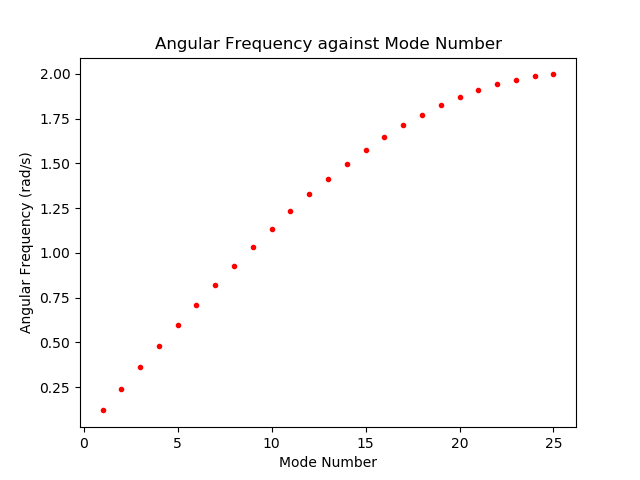

In [6]:
x1 = np.arange(1, N+1) # creates array from 1 to 25

# plots the angular frequency against the mode number
plt.figure()
plt.plot(x1, ang_freq, 'r.') # plots data as red dots
plt.xlabel("Mode Number")
plt.ylabel("Angular Frequency (rad/s)")
plt.title("Angular Frequency against Mode Number");

In the code cell above the angular frequency is plotted against the mode number.

Initially for the 1st instance, as the mode number increases, the angular frequency increases linearly. However the linear relationship breaks down at approximately mode number 15, and the rate of angular frequency increase, decreases and appears to plateau after mode number 25 to an angular frequency of about 2 rad/s. The angular frequency is proportional to the square root of the corrpesonding eigenvalue. In the 1st instance, the spring constant is the same, however eigenvalues are increasing for each successive mode. This suggests that the spring constant, though being the same for each individual spring, changes due to the other springs when in the system of springs and beads. As the mode number increases past 25, the oscillations do not increase in angular frequency because the oscillations of beads oppose and cancel out the oscillations of other beads.

Initially for the 2nd instance, as the mode number increases, the angular frequency increases linearly. However the linear relationship breaks down at approximately mode number 15, and the rate of angular frequency increase, increases. Therefore the spring constant of a spring due to other springs increases, which is shown by the increase in eigenvalues for increased mode number. This suggests that despite the spring constant increasing linearly for each successive spring, the angular frequency increases and does't plateau, unlike the angular frequency for the 1st instance where each individual spring constant is the same. This may be because as individual spring constant increase with an increase number of springs, the newly added springs act more like stationary points to which the earlier springs with lower spring constants are attached.

## Plot the Bead Displacements as a Function of Bead Number for each of the 3 Lowest Normal Modes, on a Single Plot ##

<IPython.core.display.Javascript object>


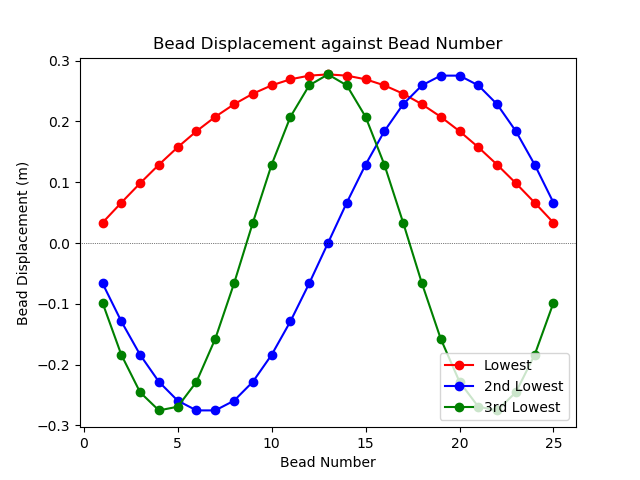

In [7]:
mode_1 = eigvec[:,0] # 1st column of eigenvector matrix = lowest mode
mode_2 = eigvec[:,1] # 2nd column of eigenvector matrix = 2nd lowest mode
mode_3 = eigvec[:,2] # 3rd column of eigenvector matrix = 3rd lowest mode

#plots bead displacement against bead number at each normal mode on single plot
plt.figure()
plt.plot(x1, mode_1, '-or', label="Lowest") # plots data of lowest mode as red dots
plt.plot(x1, mode_2, '-ob', label="2nd Lowest") # plots data of 2nd lowest mode as blue stars
plt.plot(x1, mode_3, '-og', label="3rd Lowest") # plots data of 3rd lowest mode as green x's
plt.axhline(c='k',ls=':',lw=0.5) # plots fine black dotted line at y = 0
plt.legend(loc="lower right")
plt.xlabel("Bead Number")
plt.ylabel("Bead Displacement (m)")
plt.title("Bead Displacement against Bead Number");

The code cell above shows how I have plotted the bead displacement against the bead number for the 3 lowest modes.

1st instance: In the lowest mode, the maximum displacement is for the middle bead of the system. For the 2nd lowest mode, the maximum occurs for approximately beads number 8 and 19. Bead number 12/13 has now displacement for the 2nd lowest mode, suggesting that it is a node as the progressive wave cancels out at that point. The maxima are all antinodes. For the 3rd lowest mode, the antinode of the stationary wave is at about bead number 4, 14 and 22.

2nd instance: In the lowest mode, the maximum displacement is approximately with bead 5 and then decreases at a linear rate. The 2nd lowest mode has a maximum at about beads number 2 and 15, and the 3rd lowest mode has a maximum at bead numbers 3, 8 and 19. Based on the shapes of the graphs for the 2nd instance, I do not think that a stationary wave can be formed when the spring constant of each successive spring is linearly increasing.